In [12]:
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import random

In [13]:
data = loadmat('ex7data2.mat')
X = data['X']
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

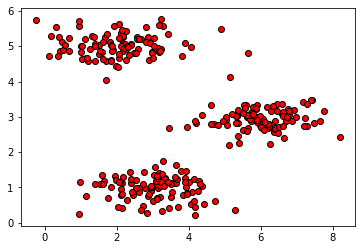

In [14]:
plt.scatter(X[:, 0], X[:, 1], marker= 'o', c= 'r',edgecolors='black')

In [15]:
def initIndexCentroids(X, K):
    return np.random.randint(X.shape[0], size= K)

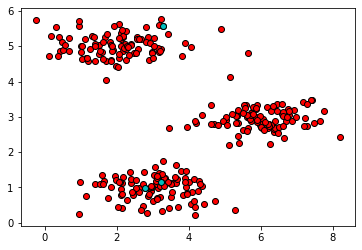

In [16]:
#Test
idx = initIndexCentroids(X, 3)
init_centroids = X[idx]
plt.scatter(X[:, 0], X[:, 1], marker= 'o', c= 'r', edgecolors= 'black')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], marker= 'o', c= 'c', edgecolors= 'black')

In [17]:
def clusterData(X, centroids):
    idx_cluster = np.zeros(X.shape[0], dtype =int)
    for i in range(idx_cluster.shape[0]):
        J = np.linalg.norm(X[i] - centroids, axis=1)
        idx_cluster[i] = np.argmin(J)
    return idx_cluster

In [18]:
def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[idx==i], axis=0)
    return centroids

In [19]:
max_iter = 20
K = 3
idx = initIndexCentroids(X, K)
centroids = X[idx]
for _ in range(max_iter):
    old_centroids = centroids
    idx_cluster = clusterData(X, centroids)
    centroids = computeCentroids(X, idx_cluster, K)

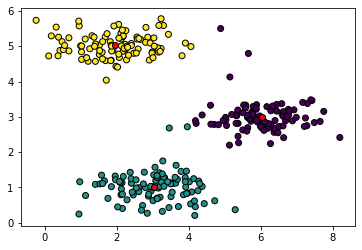

In [20]:
plt.scatter(X[:, 0], X[:, 1], marker= 'o', edgecolors= 'black', c= idx_cluster)
plt.scatter(centroids[:, 0], centroids[:, 1], marker= 'o', c= 'r', edgecolors= 'black',)

## K-means on pixels

In [22]:
import cv2

In [23]:
image = cv2.imread("bird_small.png")
X = image.reshape(-1, 3)
max_iter = 1
K = 16
idx = initIndexCentroids(X, K)
centroids = X[idx]
for _ in range(max_iter):
    old_centroids = centroids
    idx_cluster = clusterData(X, centroids)
    centroids = computeCentroids(X, idx_cluster, K)

In [24]:
new_image = centroids[idx_cluster, :].reshape(image.shape).astype('uint8')


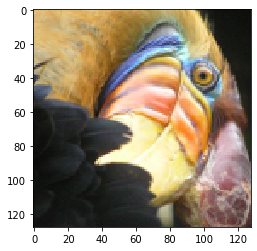

In [26]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

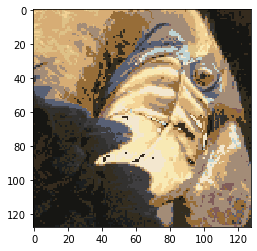

In [25]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))